<a href="https://colab.research.google.com/github/abdelhedydev/covid-tunisia/blob/master/reg_Confirmed_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd

In [128]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [129]:
confirmed_df = pd.read_csv(data_url)

In [130]:
confirmed_df.shape

(266, 158)

In [131]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189


In [132]:
confirmed_tunisia = confirmed_df.loc[confirmed_df['Country/Region']=='Tunisia',confirmed_df.columns[4:]]


5 derniers 261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, dtype: object


In [133]:
confirmed_tunisia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440,514849,526447,555383,584016,614941,645771,672846,691758,707412,739503,772416,802828,828810,850514,867624,888271,923189,955377,978142,1032913,1067579,1083341,1106470,1145906


In [134]:
dates = confirmed_tunisia.columns
dates.shape

(154,)

In [135]:
import numpy as np

In [136]:
numeros_dates = np.arange(0,len(dates),1)
confirmed_nb = confirmed_tunisia.to_numpy().reshape(-1)

In [137]:
df_tunisia = pd.DataFrame({'num_date':numeros_dates,
                           'nombre':confirmed_nb},
                           index= dates)

In [138]:
X = df_tunisia['num_date']
X

1/22/20      0
1/23/20      1
1/24/20      2
1/25/20      3
1/26/20      4
          ... 
6/19/20    149
6/20/20    150
6/21/20    151
6/22/20    152
6/23/20    153
Name: num_date, Length: 154, dtype: int64

In [139]:
y = df_tunisia.nombre
y

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/19/20    1032913
6/20/20    1067579
6/21/20    1083341
6/22/20    1106470
6/23/20    1145906
Name: nombre, Length: 154, dtype: int64

Text(0, 0.5, 'Cas confirmés')

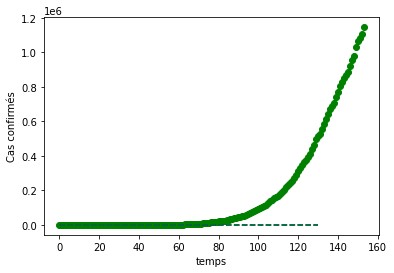

In [140]:
import matplotlib.pyplot as plt
plt.plot(X,y,'go')
plt.plot([0,130],[70,70],'b--')
plt.plot([0,130],[900,900],'g--')
plt.xlabel('temps')
plt.ylabel('Cas confirmés')

In [141]:
bins = [0,90,120,160]
y_binned = np.digitize(y,bins)

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.3,
                                                 stratify=y_binned)

In [143]:
def logistic_model(x,a,b,c):
  return c/(1+np.exp(-(x-b)/a))

In [144]:
from scipy.optimize import curve_fit
params = curve_fit(logistic_model,X_train,y_train)
a= params[0][0]
print('a',a)
b= params[0][1]
print('b',b)
c = params[0][2]

a 14.81125154456663
b 142.36446746733097


In [145]:
y_test_lin_pres = logistic_model(X_test,a,b,c)
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
mean_squared_error(y_test,y_test_lin_pres)

38445073.84998622

In [147]:
r2_score(y_test,y_test_lin_pres)

0.9995747216168327

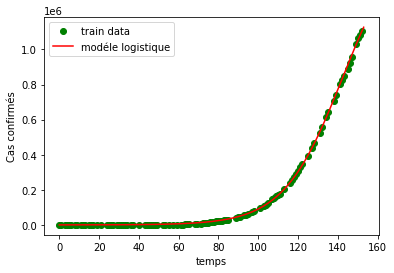

In [148]:
y_lin_pred = logistic_model(X,a,b,c)
plt.plot(X_train,y_train,'go',label='train data')
plt.plot(X,y_lin_pred,'r-',label='modéle logistique')
plt.xlabel('temps')
plt.ylabel('Cas confirmés')
plt.legend()